# 12주차-5월 23일
> 빅데이터분석특강

- toc:false
- branch: master
- badges: true
- comments: true
- author: 심재인

## imports

In [1]:
import tensorflow as tf
import tensorflow.experimental.numpy as tnp

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## CNN

### CONV의 역할

`-` 데이터생성 (그냥 흑백대비 데이터)

In [4]:
_X1 = tnp.ones([50,25])*10 
_X1

2022-05-23 23:39:32.925163: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


<tf.Tensor: shape=(50, 25), dtype=float64, numpy=
array([[10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       ...,
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.]])>

In [5]:
_X2 = tnp.zeros([50,25])*10 
_X2

<tf.Tensor: shape=(50, 25), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [6]:
tf.concat([_X1,_X2],axis=1)

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       ...,
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.]])>

In [7]:
_noise = tnp.random.randn(50*50).reshape(50,50)
_noise

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[ 0.43499408,  1.45456255, -0.12998881, ...,  1.5129041 ,
         0.47066403, -0.49720409],
       [ 0.11804438,  0.4116991 ,  0.57205759, ..., -0.25436728,
         0.93140524,  0.79676587],
       [ 1.1991391 , -0.93850147,  0.21820187, ...,  0.01887376,
         0.61925243,  1.19683334],
       ...,
       [ 1.49710101, -0.85665272, -0.25338235, ...,  0.87084421,
         1.80578589, -0.31722537],
       [ 0.86675894, -1.40209603, -0.74336001, ..., -0.63703598,
        -0.99654602, -0.13308606],
       [-0.55312832, -0.15332784, -1.00842564, ..., -0.57118478,
        -1.48817147,  0.53210246]])>

In [8]:
XXX = tf.concat([_X1,_X2],axis=1) + _noise

In [9]:
XXX=XXX.reshape(1,50,50,1)

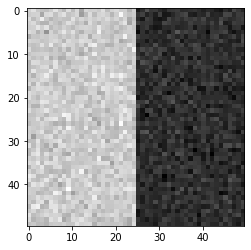

In [10]:
plt.imshow(XXX.reshape(50,50),cmap='gray')

`-` conv layer 생성

In [11]:
conv = tf.keras.layers.Conv2D(2,(2,2))

In [12]:
conv.weights # 처음에는 가중치가 없음

[]

In [14]:
conv(XXX) # 가중치를 만들기 위해서 XXX를 conv에 한번 통과시킴
conv.weights # 이제 가중치가 생김

[<tf.Variable 'conv2d/kernel:0' shape=(2, 2, 1, 2) dtype=float32, numpy=
 array([[[[ 0.62044424, -0.14030719]],
 
         [[ 0.51621205,  0.54541904]]],
 
 
        [[[ 0.02352977,  0.4980232 ]],
 
         [[ 0.4980021 , -0.49668157]]]], dtype=float32)>,
 <tf.Variable 'conv2d/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

`-` 가중치의 값을 확인해보자.

In [15]:
conv.weights[0] # kernel에 해당하는것 

<tf.Variable 'conv2d/kernel:0' shape=(2, 2, 1, 2) dtype=float32, numpy=
array([[[[ 0.62044424, -0.14030719]],

        [[ 0.51621205,  0.54541904]]],


       [[[ 0.02352977,  0.4980232 ]],

        [[ 0.4980021 , -0.49668157]]]], dtype=float32)>

In [16]:
conv.weights[1] # bias에 해당하는것

<tf.Variable 'conv2d/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

`-` 필터값을 원하는 것으로 변경해보자.

In [17]:
w0 = [[0.25,0.25],[0.25,0.25]] # 잡티를 제거하는 효과를 준다.
w1 = [[-1.0,1.0],[-1.0,1.0]] # 경계를 찾기 좋아보이는 필터이다. (엣지검출)

In [18]:
w=np.concatenate([np.array(w0).reshape(2,2,1,1),np.array(w1).reshape(2,2,1,1)],axis=-1)
w

array([[[[ 0.25, -1.  ]],

        [[ 0.25,  1.  ]]],


       [[[ 0.25, -1.  ]],

        [[ 0.25,  1.  ]]]])

In [19]:
b= np.array([0.0,0.0])
b

array([0., 0.])

In [20]:
conv.set_weights([w,b])
conv.get_weights()

[array([[[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]],
 
 
        [[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]]], dtype=float32),
 array([0., 0.], dtype=float32)]

- 첫번째는 평균을 구하는 필터,
- 두번째는 엣지를 검출하는 필터

`-` 필터를 넣은 결과를 확인

In [21]:
XXX0=conv(XXX)[...,0] # 채널0
XXX0

<tf.Tensor: shape=(1, 49, 49), dtype=float32, numpy=
array([[[ 1.06048260e+01,  1.05770826e+01,  9.41785812e+00, ...,
          4.24636483e-01,  6.65151536e-01,  4.25407767e-01],
        [ 1.01975956e+01,  1.00658646e+01,  1.02088728e+01, ...,
          2.38381013e-01,  3.28791022e-01,  8.86064231e-01],
        [ 1.04460459e+01,  9.94382954e+00,  1.01506004e+01, ...,
          4.93386388e-03,  5.66894710e-01,  8.34238470e-01],
        ...,
        [ 1.03657351e+01,  9.72592545e+00,  9.81220818e+00, ...,
          5.10783017e-01,  7.26346791e-01,  1.68213814e-01],
        [ 1.00262785e+01,  9.18612766e+00,  9.75990772e+00, ...,
         -2.75579393e-02,  2.60762036e-01,  8.97321180e-02],
        [ 9.68955231e+00,  9.17319775e+00,  9.22979259e+00, ...,
          1.54596567e-03, -9.23234582e-01, -5.21425247e-01]]],
      dtype=float32)>

In [22]:
XXX1=conv(XXX)[...,1] # 채널1
XXX1

<tf.Tensor: shape=(1, 49, 49), dtype=float32, numpy=
array([[[ 1.3132229 , -1.4241924 , -3.2127066 , ...,  0.8185276 ,
          0.14353245, -1.1025076 ],
        [-1.8439856 ,  1.3170614 , -0.7450247 , ..., -1.424511  ,
          1.7861512 ,  0.44294155],
        [-1.6768751 , -0.33199215,  1.1590748 , ...,  2.0713122 ,
          0.17653114,  0.89284396],
        ...,
        [-1.510889  , -1.0483484 ,  1.3934813 , ..., -0.52731544,
          1.3895706 , -3.6221027 ],
        [-4.622608  ,  1.2620058 ,  1.0331154 , ...,  0.5778482 ,
          0.5754316 , -1.2595514 ],
        [-1.8690548 , -0.19636154,  0.42274094, ..., -2.4226255 ,
         -1.2764968 ,  2.8837337 ]]], dtype=float32)>

`-` 각 채널을 시각화

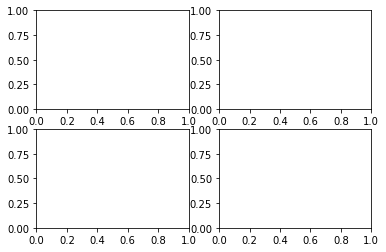

In [23]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

In [24]:
ax1.imshow(XXX.reshape(50,50),cmap='gray')

In [25]:
ax3.imshow(XXX0.reshape(49,49),cmap='gray')

In [26]:
ax4.imshow(XXX1.reshape(49,49),cmap='gray')

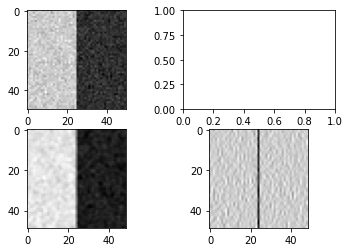

In [27]:
fig

- 2사분면: 원래이미지
- 3사분면: 원래이미지 -> 평균을 의미하는 conv적용
- 4사분면: 원래이미지 -> 엣지를 검출하는 conv적용

`-` conv(XXX)의 각 채널에 한번더 conv를 통과시켜보자

In [28]:
conv(XXX0.reshape(1,49,49,1))[...,0] ### XXX0 -> 평균필터 <=> XXX -> 평균필터 -> 평균필터
conv(XXX0.reshape(1,49,49,1))[...,1] ### XXX0 -> 엣지필터 <=> XXX -> 평균필터 -> 엣지필터
conv(XXX1.reshape(1,49,49,1))[...,0] ### XXX1 -> 평균필터 <=> XXX -> 엣지필터 -> 평균필터
conv(XXX1.reshape(1,49,49,1))[...,1] ### XXX1 -> 엣지필터 <=> XXX -> 엣지필터 -> 엣지필터

<tf.Tensor: shape=(1, 48, 48), dtype=float32, numpy=
array([[[ 0.42363167, -3.8506002 ,  7.6590166 , ...,  1.3501115 ,
          2.535667  , -2.5892496 ],
        [ 4.50593   , -0.5710192 , -2.3014793 , ...,  1.9920747 ,
          1.315881  , -0.62689686],
        [ 0.6287384 , -0.7128773 , -0.25666904, ...,  7.359749  ,
         -5.6628413 , -0.5227418 ],
        ...,
        [-4.64602   ,  0.3820057 ,  4.484874  , ..., -5.436521  ,
          7.013876  , -7.2203174 ],
        [ 6.3471546 ,  2.2129393 , -1.3012562 , ...,  2.1494873 ,
          1.9144695 , -6.8466563 ],
        [ 7.5573072 ,  0.39021206, -3.2200584 , ..., -0.03537035,
          1.1437122 ,  2.3252475 ]]], dtype=float32)>

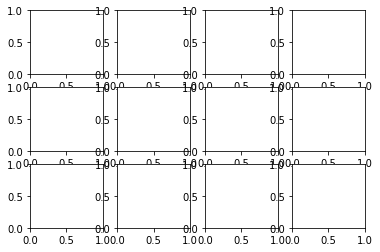

In [29]:
fig,ax =plt.subplots(3,4)

In [30]:
ax[0][0].imshow(XXX.reshape(50,50),cmap='gray') # 원래이미지

In [31]:
ax[1][0].imshow(XXX0.reshape(49,49),cmap='gray') # 원래이미지 -> 평균필터 
ax[1][2].imshow(XXX1.reshape(49,49),cmap='gray') # 원래이미지 -> 엣지필터

In [32]:
ax[2][0].imshow(conv(XXX0.reshape(1,49,49,1))[...,0].reshape(48,48),cmap='gray') # 원래이미지 -> 평균필터 
ax[2][1].imshow(conv(XXX0.reshape(1,49,49,1))[...,1].reshape(48,48),cmap='gray') # 원래이미지 -> 엣지필터
ax[2][2].imshow(conv(XXX1.reshape(1,49,49,1))[...,0].reshape(48,48),cmap='gray') # 원래이미지 -> 평균필터 
ax[2][3].imshow(conv(XXX1.reshape(1,49,49,1))[...,1].reshape(48,48),cmap='gray') # 원래이미지 -> 엣지필터

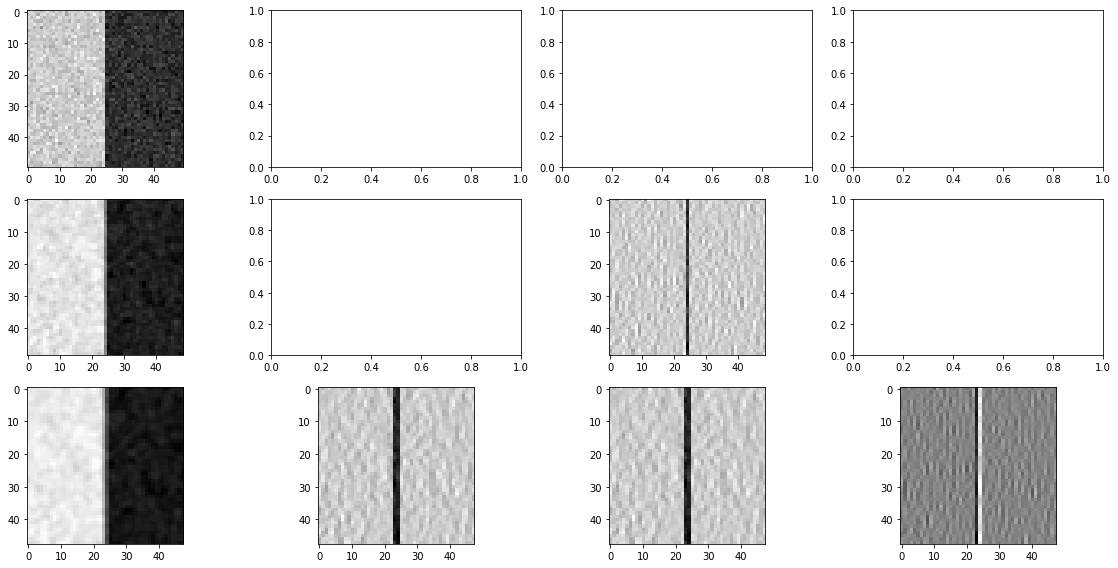

In [33]:
fig.set_figheight(8)
fig.set_figwidth(16)
fig.tight_layout()
fig

`-` 요약 
- conv의 weight에 따라서 엣지를 검출하는 필터가 만들어지기도 하고 스무딩의 역할을 하는 필터가 만들어지기도 한다. 그리고 우리는 의미를 알 수 없지만 어떠한 역할을 하는 필터가 만들어질 것이다. 
- 이것들을 조합하다보면 우연히 이미지를 분류하기에 유리한 특징을 뽑아내는 weight가 맞춰질 수도 있겠다. 
- 채널수를 많이 만들고 다양한 웨이트조합을 실험하다보면 보다 복잡한 이미지의 특징을 추출할 수도 있을 것이다? 
- 컨볼루션 레이어의 역할 = 이미지의 특징을 추출하는 역할 

`-` 참고: 스트라이드, 패딩
- 스트라이드: 윈도우가 1칸씩 이동하는 것이 아니라 2~3칸씩 이동함 
- 패딩: 이미지의 가장자리에 정당한 값을 넣어서 (예를들어 0) 컨볼루션을 수행. 따라서 컨볼루션 연산 이후에도 이미지의 크기가 줄어들지 않도록 방지한다.

### MAXPOOL

`-` 기본적역할: 이미지의 크기를 줄이는 것
- 이미지의의 크기를 줄여야하는 이유? 어차피 최종적으로 10차원으로 줄어야하므로
- 이미지의 크기를 줄이면서도 동시에 아주 크리티컬한 특징은 손실없이 유지하고 싶다~

`-` 점점 작은 이미지가 되면서 중요한 특징들은 살아남지만 그렇지 않으면 죽는다. (캐리커쳐 느낌)

`-` 평균이 아니라 max를 쓴 이유는? 그냥 평균보다 나을것이라고 생각했음.. 
- 그런데 사실은 꼭 그렇지만은 않아서 최근에는 꼭 맥스풀링을 고집하진 않는 추세 (평균풀링도 많이씀)

### CNN 아키텍처의 표현방법

`-` 아래와 같이 아키텍처의 다이어그램형태로 표현하고 굳이 노드별로 이미지를 그리진 않음

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/2560px-Comparison_image_neural_networks.svg.png)

`-` 물론 아래와 같이 그리는 경우도 있음

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

### Discusstion about CNN

`-` 격자형태로 배열된 자료를 처리하는데 특화된 신경망이다.
- 시계열 (1차원격자), 이미지 (2차원격자)

`-` 실제응용에서 엄청난 성공을 거두었다.

`-` 이름의 유래는 컨볼루션이라는 수학적 연산을 사용했기 때문
- 컨볼루션은 조금 특별한 선형변환이다.

`-` 신경과학의 원리가 심층학습에 영향을 미친 사례이다.

### CNN의 모티브

`-` 희소성 + 매개변수의 공유
- 다소 철학적인 모티브임 
- 희소성: 이미지를 분석하여 특징을 뽑아낼때 부분부분의 특징만 뽑으면 된다는 의미 
- 매개변수의 공유: 한 채널에는 하나의 역할을 하는 커널을 설계하면 된다는 의미 (스무딩이든 엣징이든). 즉 어떤지역은 스무딩, 어떤지역은 엣징을 할 필요가 없이 한채널에서는 엣징만, 다른채널에서는 스무딩만 수행한뒤 여러채널을 조합해서 이해하면 된다.

`-` 매개변수 공유효과로 인해서 파라메터가 확 줄어든다.

(예시) (1,6,6,1) -> (1,5,5,2)
- MLP방식이면 (36,50) 의 차원을 가진 매트릭스가 필요함 => 1800개의 매개변수 필요
- CNN은 8개의 매개변수 필요

### CNN 신경망의 기본구조

`-` 기본유닛
- conv - activation - pooling
- conv - conv - activation - pooling

## 모형의 성능을 올리기 위한 노력들

### dropout

`-` 아래의 예제를 복습하자.

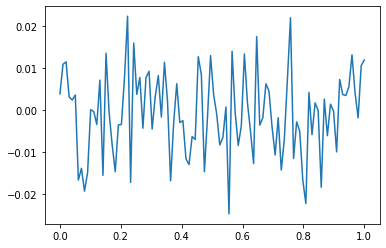

In [35]:
np.random.seed(43052)
x = np.linspace(0,1,100).reshape(100,1)
y = np.random.normal(loc=0,scale=0.01,size=(100,1))
plt.plot(x,y)

In [36]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x,y,epochs=5000,verbose=0,batch_size=100)

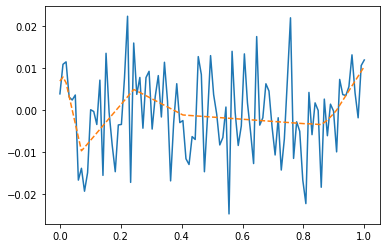

In [37]:
plt.plot(x,y)
plt.plot(x,net(x),'--')

`-` train/test로 나누어서 생각해보자.

In [38]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x[:80],y[:80],epochs=5000,verbose=0,batch_size=80)

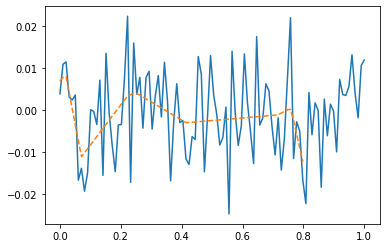

In [39]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')

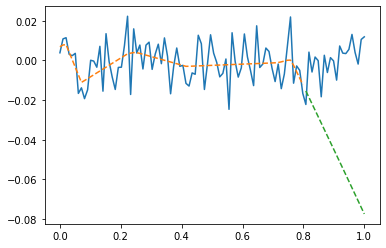

In [40]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')
plt.plot(x[80:],net(x[80:]),'--')

- train에서 추세를 따라가는게 좋은게 아니다 $\to$ 그냥 직선으로 핏하는거 이외에는 다 오버핏이다.

`-` 매 에폭마다 적당히 80%의 노드들을 빼고 학습하자 $\to$ 너무 잘 학습되는 문제는 생기지 않을 것이다 (과적합이 방지될것이다?)

In [41]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dropout(0.8))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x[:80],y[:80],epochs=5000,verbose=0,batch_size=80)

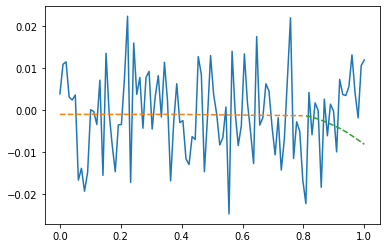

In [42]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')
plt.plot(x[80:],net(x[80:]),'--')

`-` 드랍아웃에 대한 summary
- 직관: 특정노드를 랜덤으로 off시키면 학습이 방해되어 오히려 과적합이 방지되는 효과가 있다 (그렇지만 진짜 중요한 특징이라면 랜덤으로 off 되더라도 어느정도는 학습될 듯)
- note: 드랍아웃을 쓰면 오버핏이 줄어드는건 맞지만 완전히 없어지는건 아니다. 
- note: 오버핏을 줄이는 유일한 방법이 드랍아웃만 있는것도 아니며, 드랍아웃이 오버핏을 줄이는 가장 효과적인 방법도 아니다 (최근에는 dropout보다 batch nomalization을 사용하는 추세임)

### train / val / test

`-` data

In [43]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [44]:
X= x_train.reshape(-1,28,28,1)/255 ## 입력이 0~255 -> 0~1로 표준화 시키는 효과 + float으로 자료형이 바뀜 
y = tf.keras.utils.to_categorical(y_train)
XX = x_test.reshape(-1,28,28,1)/255
yy = tf.keras.utils.to_categorical(y_test)

In [45]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [47]:
#collapse_output
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1)

Epoch 1/200
240/240 [==============================] - 0s 1ms/step - loss: 0.0771 - accuracy: 0.9730 - val_loss: 0.6902 - val_accuracy: 0.8716
Epoch 2/200
240/240 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9739 - val_loss: 0.6385 - val_accuracy: 0.8742
Epoch 3/200
240/240 [==============================] - 0s 1ms/step - loss: 0.0710 - accuracy: 0.9760 - val_loss: 0.6561 - val_accuracy: 0.8745
Epoch 4/200
240/240 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9741 - val_loss: 0.6628 - val_accuracy: 0.8733
Epoch 5/200
240/240 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9761 - val_loss: 0.6443 - val_accuracy: 0.8732
Epoch 6/200
240/240 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9750 - val_loss: 0.6691 - val_accuracy: 0.8744
Epoch 7/200
240/240 [==============================] - 0s 1ms/step - loss: 0.0728 - accuracy: 0.9749 - val_loss: 0.6781 - val_accuracy: 0.8691

`-` 텐서보드 여는 방법1

In [48]:
%load_ext tensorboard
# 주피터노트북 (혹은 주피터랩)에서 텐서보드를 임베딩하여 넣을 수 있도록 도와주는 매직펑션

In [49]:
!rm -rf logs
!kill 313799

/bin/bash: line 0: kill: (313799) - No such process


In [50]:
#
# %tensorboard --logdir logs --host 0.0.0.0
# %tensorboard --logdir logs <-- 실습에서는 이렇게 하면됩니다.

(참고사항) 파이썬 3.10의 경우 아래의 수정이 필요

`?/python3.10/site-packages/tensorboard/_vendor/html5lib/_trie/_base.py` 을 열고
```python
from collections import Mapping ### 수정전
from collections.abc import Mapping ### 수정후 
```
와 같이 수정한다.

- 왜냐하면 파이썬 3.10부터 `from collections import Mapping` 가 동작하지 않고 `from collections.abc import Mapping` 가 동작하도록 문법이 바뀜

`-` 텐서보드를 실행하는 방법2

In [51]:
#
# !tensorboard --logdir logs --host 0.0.0.0
# !tensorboard --logdir logs <-- 실습에서는 이렇게 하면됩니다.

### 조기종료

`-` 텐서보드를 살펴보니 특정에폭 이후에는 오히려 과적합이 진행되는 듯 하다 (학습할수록 손해인듯 하다) $\to$ 그 특정에폭까지만 학습해보자

In [52]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 과적합좀 시키려고
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 레이어를 2장만듬 + 레이어하나당 노드수도 증가
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [53]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1)

Epoch 1/200
240/240 [==============================] - 2s 7ms/step - loss: 0.5488 - accuracy: 0.8131 - val_loss: 0.4051 - val_accuracy: 0.8520
Epoch 2/200
240/240 [==============================] - 2s 6ms/step - loss: 0.3584 - accuracy: 0.8662 - val_loss: 0.3804 - val_accuracy: 0.8630
Epoch 3/200
240/240 [==============================] - 2s 6ms/step - loss: 0.3232 - accuracy: 0.8792 - val_loss: 0.3610 - val_accuracy: 0.8695
Epoch 4/200
240/240 [==============================] - 2s 7ms/step - loss: 0.2980 - accuracy: 0.8879 - val_loss: 0.3567 - val_accuracy: 0.8760
Epoch 5/200
240/240 [==============================] - 2s 6ms/step - loss: 0.2795 - accuracy: 0.8957 - val_loss: 0.3310 - val_accuracy: 0.8803
Epoch 6/200
240/240 [==============================] - 2s 6ms/step - loss: 0.2614 - accuracy: 0.9009 - val_loss: 0.3195 - val_accuracy: 0.8850
Epoch 7/200
240/240 [==============================] - 2s 6ms/step - loss: 0.2490 - accuracy: 0.9059 - val_loss: 0.3192 - val_accuracy: 0.8846

In [54]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1)

Epoch 1/200
240/240 [==============================] - 2s 7ms/step - loss: 0.2203 - accuracy: 0.9153 - val_loss: 0.3388 - val_accuracy: 0.8836
Epoch 2/200
240/240 [==============================] - 2s 6ms/step - loss: 0.2071 - accuracy: 0.9198 - val_loss: 0.3084 - val_accuracy: 0.8949
Epoch 3/200
240/240 [==============================] - 2s 6ms/step - loss: 0.1971 - accuracy: 0.9239 - val_loss: 0.3246 - val_accuracy: 0.8938


In [55]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1)

Epoch 1/200
240/240 [==============================] - 2s 7ms/step - loss: 0.1882 - accuracy: 0.9259 - val_loss: 0.3651 - val_accuracy: 0.8841
Epoch 2/200
240/240 [==============================] - 2s 6ms/step - loss: 0.1773 - accuracy: 0.9306 - val_loss: 0.3383 - val_accuracy: 0.8951
Epoch 3/200
240/240 [==============================] - 2s 6ms/step - loss: 0.1697 - accuracy: 0.9350 - val_loss: 0.3640 - val_accuracy: 0.8892


In [56]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1)

Epoch 1/200
240/240 [==============================] - 2s 7ms/step - loss: 0.1662 - accuracy: 0.9349 - val_loss: 0.3734 - val_accuracy: 0.8868
Epoch 2/200
240/240 [==============================] - 2s 6ms/step - loss: 0.1584 - accuracy: 0.9386 - val_loss: 0.3508 - val_accuracy: 0.8958
Epoch 3/200
240/240 [==============================] - 2s 6ms/step - loss: 0.1529 - accuracy: 0.9396 - val_loss: 0.3677 - val_accuracy: 0.8910


In [57]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1)

Epoch 1/200
240/240 [==============================] - 2s 7ms/step - loss: 0.1430 - accuracy: 0.9437 - val_loss: 0.4126 - val_accuracy: 0.8827
Epoch 2/200
240/240 [==============================] - 2s 7ms/step - loss: 0.1365 - accuracy: 0.9462 - val_loss: 0.3737 - val_accuracy: 0.8960
Epoch 3/200
240/240 [==============================] - 2s 6ms/step - loss: 0.1283 - accuracy: 0.9495 - val_loss: 0.3876 - val_accuracy: 0.8944


In [58]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1)

Epoch 1/200
240/240 [==============================] - 2s 7ms/step - loss: 0.1251 - accuracy: 0.9519 - val_loss: 0.4141 - val_accuracy: 0.8912
Epoch 2/200
240/240 [==============================] - 2s 6ms/step - loss: 0.1212 - accuracy: 0.9537 - val_loss: 0.3776 - val_accuracy: 0.8965
Epoch 3/200
240/240 [==============================] - 2s 6ms/step - loss: 0.1109 - accuracy: 0.9576 - val_loss: 0.4690 - val_accuracy: 0.8857


`-` 몇 번 좀 참았다가 멈추면 좋겠다.

In [59]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 과적합좀 시키려고 
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 레이어를 2장만듬 + 레이어하나당 노드수도 증가 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [60]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=5) # 좀더 참다가 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1)

Epoch 1/200
240/240 [==============================] - 2s 7ms/step - loss: 0.5484 - accuracy: 0.8132 - val_loss: 0.4164 - val_accuracy: 0.8487
Epoch 2/200
240/240 [==============================] - 2s 6ms/step - loss: 0.3566 - accuracy: 0.8669 - val_loss: 0.3689 - val_accuracy: 0.8686
Epoch 3/200
240/240 [==============================] - 2s 6ms/step - loss: 0.3232 - accuracy: 0.8783 - val_loss: 0.3544 - val_accuracy: 0.8752
Epoch 4/200
240/240 [==============================] - 2s 6ms/step - loss: 0.2990 - accuracy: 0.8870 - val_loss: 0.3473 - val_accuracy: 0.8777
Epoch 5/200
240/240 [==============================] - 2s 6ms/step - loss: 0.2810 - accuracy: 0.8957 - val_loss: 0.3311 - val_accuracy: 0.8807
Epoch 6/200
240/240 [==============================] - 2s 6ms/step - loss: 0.2646 - accuracy: 0.9004 - val_loss: 0.3191 - val_accuracy: 0.8817
Epoch 7/200
240/240 [==============================] - 2s 6ms/step - loss: 0.2491 - accuracy: 0.9059 - val_loss: 0.3294 - val_accuracy: 0.8827

`-` 텐서보드로 그려보자?

In [61]:
#
# %tensorboard --logdir logs --host 0.0.0.0 
# 아무것도 안나온다 -> 왜? cb1을 써야 텐서보드가 나옴

`-` 조기종료와 텐서보드를 같이 쓰려면?

In [62]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu')) 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [63]:
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=7) # 좀더 참다가 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2])

Epoch 1/200
240/240 [==============================] - 1s 2ms/step - loss: 0.7184 - accuracy: 0.7581 - val_loss: 0.5077 - val_accuracy: 0.8276
Epoch 2/200
240/240 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.8386 - val_loss: 0.4793 - val_accuracy: 0.8342
Epoch 3/200
240/240 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.8517 - val_loss: 0.4386 - val_accuracy: 0.8497
Epoch 4/200
240/240 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8582 - val_loss: 0.4029 - val_accuracy: 0.8603
Epoch 5/200
240/240 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8669 - val_loss: 0.3932 - val_accuracy: 0.8619
Epoch 6/200
240/240 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8705 - val_loss: 0.3842 - val_accuracy: 0.8657
Epoch 7/200
240/240 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8759 - val_loss: 0.3844 - val_accuracy: 0.8668

In [64]:
# 
# 조기종료가 구현된 그림이 출력
# %tensorboard --logdir logs --host 0.0.0.0

### 하이퍼파라메터 선택

`-` 하이퍼파라메터 설정

In [65]:
from tensorboard.plugins.hparams import api as hp

In [66]:
a=net.evaluate(XX,yy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8715


In [67]:
!rm -rf logs
for u in [50,5000]: 
    for d in [0.0,0.5]: 
        for o in ['adam','sgd']:
            logdir = 'logs/hpguebin_{}_{}_{}'.format(u,d,o)
            with tf.summary.create_file_writer(logdir).as_default():
                net = tf.keras.Sequential()
                net.add(tf.keras.layers.Flatten())
                net.add(tf.keras.layers.Dense(u,activation='relu'))
                net.add(tf.keras.layers.Dropout(d))
                net.add(tf.keras.layers.Dense(10,activation='softmax'))
                net.compile(optimizer=o,loss=tf.losses.categorical_crossentropy,metrics=['accuracy','Recall'])
                cb3 = hp.KerasCallback(logdir, {'유닛수':u, '드랍아웃비율':d, '옵티마이저':o})
                net.fit(X,y,epochs=3,callbacks=cb3)
                _rslt=net.evaluate(XX,yy)
                _mymetric=_rslt[1]*0.8 + _rslt[2]*0.2  
                tf.summary.scalar('애큐러시와리컬의가중평균(테스트셋)', _mymetric, step=1)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5255 - accuracy: 0.8180 - recall: 0.7546
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3993 - accuracy: 0.8588 - recall: 0.8294
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.8545 - recall: 0.8286
Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7744 - accuracy: 0.7503 - recall: 0.5797
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5204 - accuracy: 0.8223 - recall: 0.7565
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.4899 - accuracy: 0.8304 - recall: 0.7831
Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7502 - accuracy: 0.7356 - recall: 0.6115
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5738 - accuracy: 0.7923 - recall: 0.7133
Epoch 3/3
313/313 [==============================] - 1s 1ms/

In [68]:
#
#%tensorboard --logdir logs --host 0.0.0.0

## 숙제

`-` 아래의 네트워크에서 옵티마이저를 adam, sgd를 선택하여 각각 적합시켜보고 testset의 loss를 성능비교를 하라. epoch은 5정도로 설정하라. 
```
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer=???,loss=tf.losses.categorical_crossentropy,metrics=['accuracy','Recall'])
```